# KNN 최근접 이웃 알고리즘
- 오렌지 자몽 구분하는 머신러닝


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
orange_diameter = df.loc[df.name == 'orange', 'diameter']
orange_weight = df.loc[df.name == 'orange', 'weight']
grapefruit_diameter = df.loc[df.name == 'grapefruit', 'diameter']
grapefruit_weight = df.loc[df.name == 'grapefruit', 'weight']

산점도

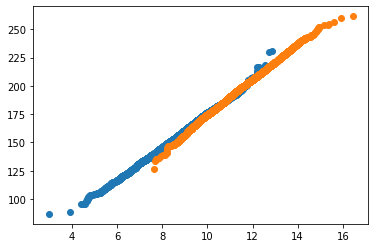

In [ ]:
plt.scatter(orange_diameter, orange_weight)
plt.scatter(grapefruit_diameter, grapefruit_weight)
plt.show()

In [ ]:
# 크기와 무게 묶어주기
data = [[d,w] for d,w in zip(df.diameter, df.weight)]
print(data)
print(len(data))

[[2.96, 86.76], [3.91, 88.05], [4.42, 95.17], [4.47, 95.6], [4.48, 95.76], [4.59, 95.86], [4.64, 97.94], [4.65, 98.5], [4.68, 100.2], [4.69, 100.31], [4.73, 101.33], [4.74, 101.66], [4.75, 101.8], [4.77, 102.56], [4.78, 103.06], [4.82, 103.1], [4.85, 103.44], [4.91, 103.46], [4.97, 104.01], [5.02, 104.1], [5.02, 104.19], [5.08, 104.56], [5.1, 104.7], [5.11, 104.82], [5.15, 104.98], [5.16, 105.22], [5.22, 105.42], [5.22, 105.47], [5.24, 105.6], [5.24, 105.62], [5.25, 105.68], [5.26, 106.29], [5.3, 106.43], [5.3, 106.85], [5.3, 106.9], [5.32, 106.94], [5.34, 106.94], [5.35, 107.01], [5.36, 107.3], [5.37, 107.64], [5.37, 107.77], [5.37, 107.85], [5.38, 108.16], [5.4, 108.18], [5.43, 108.54], [5.45, 108.63], [5.47, 108.69], [5.47, 108.85], [5.48, 108.93], [5.48, 109.16], [5.48, 109.32], [5.48, 109.37], [5.49, 109.49], [5.51, 109.49], [5.51, 109.52], [5.51, 109.59], [5.52, 110.36], [5.53, 110.4], [5.53, 110.42], [5.57, 110.47], [5.57, 110.75], [5.58, 110.89], [5.59, 110.9], [5.6, 111.0], [5

In [ ]:
data_target = [1]*len(orange_diameter)+ [0]*len(grapefruit_diameter)
print(data_target)
print(len(data_target))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
kn = KNeighborsClassifier()
kn.fit(data, data_target)

KNeighborsClassifier()

In [ ]:
# 정확도
kn.score(data, data_target)

0.9833

예측

In [ ]:
kn.predict([[16,251]])

array([0])

In [ ]:
kn.predict([[10.5,171]])

array([0])

In [ ]:
kn.predict([[5.0,101]])

array([1])

In [ ]:
kn.predict([[10,225]])

array([0])

In [ ]:
print(kn._fit_X)
print(kn._y)

[[  2.96  86.76]
 [  3.91  88.05]
 [  4.42  95.17]
 ...
 [ 15.59 256.5 ]
 [ 15.92 260.14]
 [ 16.45 261.51]]
[1 1 1 ... 0 0 0]


In [ ]:
# 모델 정확도 테스트
for n in range(5,50):
  # 죄근접 이웃 개수 설정
  kn.n_neighbors = n 
  # 점수 계산
  score = kn.score(data, data_target)
  # 100% 정확도에 미치지 못하는 이웃 개수 출력
  if score < 0.9:
    print(n,score)
    break

39 0.8988
